In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [131]:
#load data from DB

path = r'..\COVID-19\csse_covid_19_data\csse_covid_19_time_series'

Confirmed = pd.read_csv(path + "/time_series_19-covid-Confirmed.csv", index_col=None, header=0)
Deaths = pd.read_csv(path + "/time_series_19-covid-Deaths.csv", index_col=None, header=0)
Recovered = pd.read_csv(path + "/time_series_19-covid-Recovered.csv", index_col=None, header=0)


In [247]:
#classes
class Country:
    def __init__(self, n = ''):
        self.name = n
        self.latitude = Confirmed[Confirmed.loc[:, 'Country/Region'] == n].sum()[2]
        self.longtitude = Confirmed[Confirmed.loc[:, 'Country/Region'] == n].sum()[3]
        self.confirmed = Confirmed[Confirmed.loc[:, 'Country/Region'] == n].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
        self.deaths = Deaths[Deaths.loc[:, 'Country/Region'] == n].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
        self.recovered = Recovered[Recovered.loc[:, 'Country/Region'] == n].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
        self.actual = self.confirmed - (self.deaths + self.recovered) 
        self.newCases = Confirmed[Confirmed.loc[:, 'Country/Region'] == n].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
        for i in range(1, len(self.newCases)):
            self.newCases[i] = self.newCases[i] - self.newCases[i-1]
        return
    
    name = ''
    latitude = ''
    longtitude = ''
    confirmed = []
    deaths = []
    recovered = []
    actual = []
    newCases = []   
    
    pass


In [249]:
#analysed country

analysedCountry = Country('Poland')
print(analysedCountry.longtitude)

19.1451


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 <a list of 58 Text xticklabel objects>)

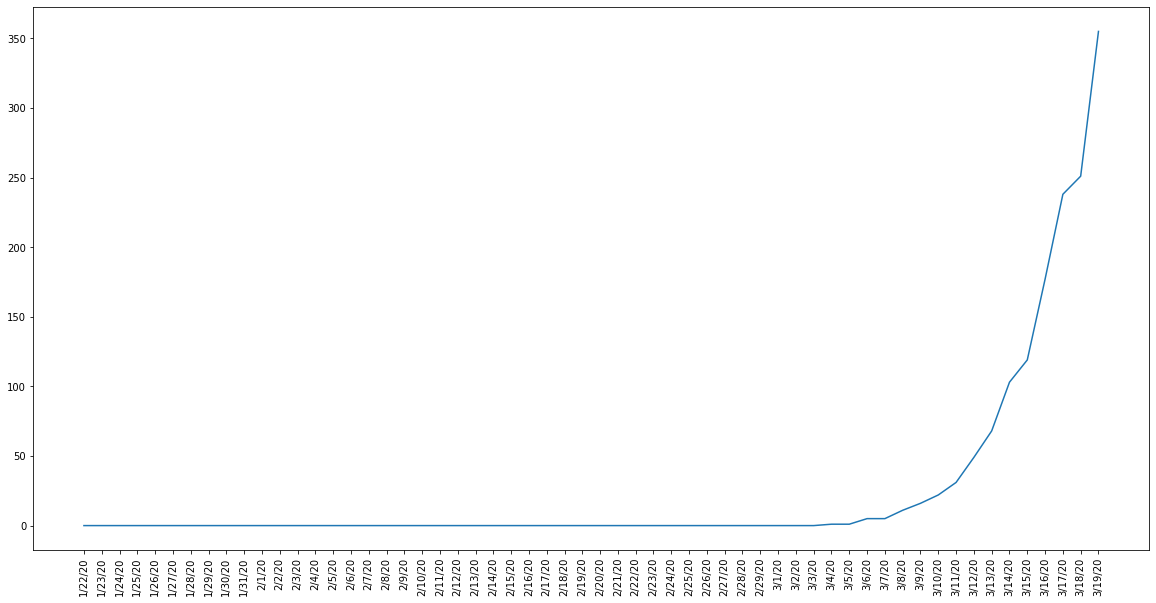

In [258]:
#display basic data for chosen country

plt.figure(figsize=(20, 10))
plt.plot(analysedCountry.confirmed)
#plt.plot(analysedCountry.deaths)
#plt.plot(analysedCountry.recovered)
#plt.plot(analysedCountry.actual)
#plt.plot(analysedCountry.newCases)

plt.xticks(rotation=90)